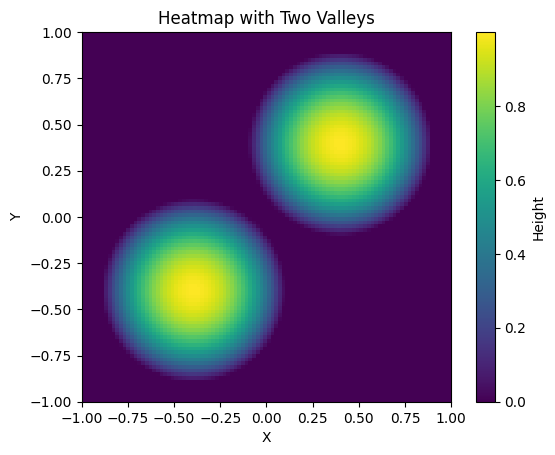

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# 定义一个函数来计算给定点与山谷中心之间的距离
def calculate_height(x, y, center_x, center_y, max_height, radius):
    distance = np.sqrt((x - center_x)**2 + (y - center_y)**2)
    if distance <= radius:
        # 使用简单的线性关系来调整高度，距离中心越近，高度越高
        return max_height * (1 - distance / radius)
    else:
        return 0

# 创建100x100的二维网格
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, y)

# 初始化热度图数组
heatmap = np.zeros_like(X)

# 计算每个点的高度
for i in range(100):
    for j in range(100):
        height1 = calculate_height(X[i, j], Y[i, j], -0.4, -0.4, 1, 0.5)
        height2 = calculate_height(X[i, j], Y[i, j], 0.4, 0.4, 1, 0.5)
        # 热度图中的高度为两个山谷高度的最大值
        heatmap[i, j] = height1 +  height2
        

# 保存热度图
np.save('heatmap.npy', heatmap)

# 可视化热度图
plt.imshow(heatmap, extent=(-1, 1, -1, 1), origin='lower', cmap='viridis')
plt.colorbar(label='Height')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Heatmap with Two Valleys')
plt.show()


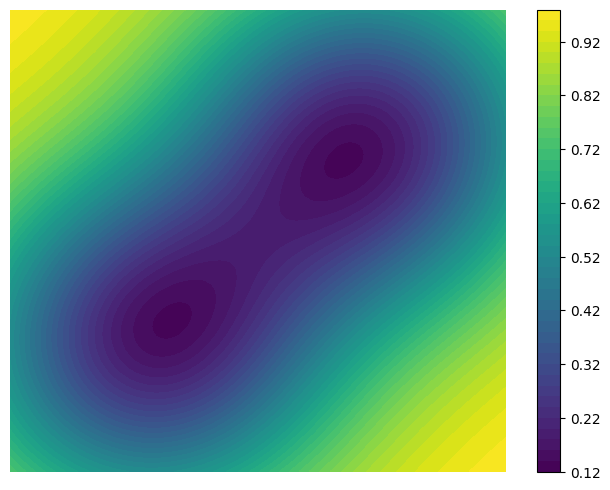

In [24]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_height(x, y, center_x, center_y, max_height, radius):
    distance = np.sqrt((x - center_x)**2 + (y - center_y)**2)
    # 使用高斯函数来平滑地调整高度
    return max_height * np.exp(- (distance**2) / (2 * (radius**2)))

# 创建100x100的二维网格
x = np.linspace(-1.5, 1.5, 100)
y = np.linspace(-1.5, 1.5, 100)
X, Y = np.meshgrid(x, y)

# 初始化热度图数组
heatmap = np.zeros_like(X)

# 计算每个点的高度
for i in range(100):
    for j in range(100):
        # 增大山谷的半径以扩大其影响范围
        height1 = calculate_height(X[i, j], Y[i, j], -0.66, -0.66, 0.8, 0.8)
        height2 = calculate_height(X[i, j], Y[i, j], 0.66, 0.66, 0.8, 0.8)
        heatmap[i, j] = height1 + height2  # 将两个山谷的高度叠加
        heatmap[i, j] = 1- heatmap[i, j]  # 反转热度图

# 绘制等高线图
plt.figure(figsize=(8, 6))
# 使用contourf绘制填充的等高线图，可以通过调整levels参数控制等高线的数量
contour = plt.contourf(X, Y, heatmap, levels=50, cmap='viridis')
plt.colorbar(contour)
# turn off axis
plt.axis('off')

# 显示图形
plt.show()
